In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok-dataset/tiktok_dataset (1).csv


**Importing data**

In [2]:
#pacakges for data manipulation
import pandas as pd
import numpy as np


#pacakges for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

#data modelling
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( confusion_matrix , ConfusionMatrixDisplay,\
                             classification_report)




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/tiktok-dataset/tiktok_dataset (1).csv')

* **EDA - EXPLORATORY DATA ANALYSIS**
* **DATA MANIPULATION**

In [4]:
data.head()

#The dataframe contains collection of text, categorical and numerical data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
data.shape

(19382, 12)

In [6]:
data.info()

#There are 19382 observations but some variable have missing values eg claim status , video_transcription_text \
# and all of count variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
data.describe()

# there are outliers at high end of Distribution
# Large Standard Deviation
# Maximum values are much higher as compared to their Quartile values

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


# Missing and duplicat data

In [8]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
data=data.dropna(axis=0)

In [10]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
data.duplicated().sum()

0

# Checking outliers - box plot , Histogram

<Axes: title={'center': 'video duration sec'}, xlabel='video_duration_sec'>

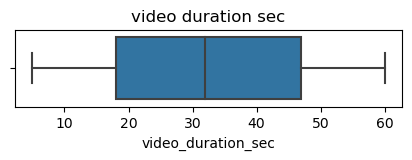

In [12]:
#'Video_duration_sec'
plt.figure(figsize=(5,1))
plt.title('video duration sec')
sns.boxplot(x=data.video_duration_sec)

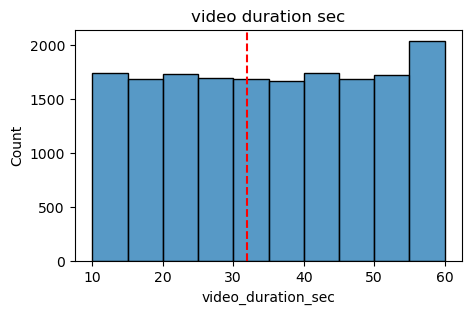

In [13]:
plt.figure(figsize=(5,3))
plt.title('video duration sec')
median = data.video_duration_sec.median()
ax = sns.histplot(data.video_duration_sec , bins =range(10,61,5))
ax.axvline(median , ls='--' , color = 'red')

#the distribution is uniform

<Axes: title={'center': 'vidoe view count'}, xlabel='video_view_count'>

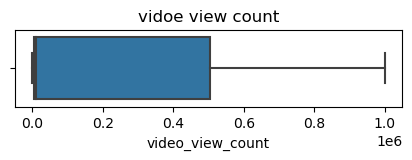

In [14]:
plt.figure(figsize=(5,1))
plt.title('vidoe view count')
sns.boxplot(x=data.video_view_count)

In [15]:
#Helper function to plot histogram

def histogrammer(column_str , median_text=True , **kwargs):
    median = round(data[column_str].median(),1)
    plt.figure(figsize=(5,3))
    ax=sns.histplot(x=data[column_str], **kwargs)
    plt.axvline(median , ls='--',color='red')
    if median_text == True:
        ax.text(0.25 ,0.85 , f'median={median}' , color='red', ha='left',\
                va='top', transform = ax.transAxes)
    else:
        print('Median :' , median)
    plt.title(f'{column_str} histogram');

In [16]:
def boxplott (column_str):
    plt.figure(figsize=(10,1))
#     plt.title(f'{cloumn_str} box plot')
    sns.boxplot(x=data[column_str])

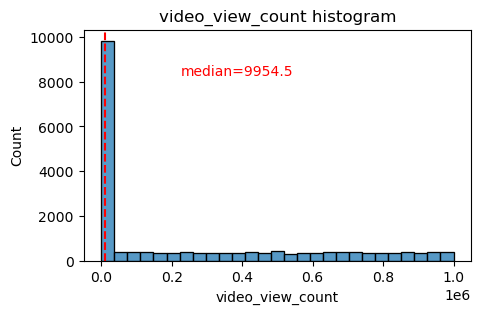

In [17]:
# plt.figure(figsize=(5,3))
# plt.title('video view count')
# median = data.video_view_count.median()
# ax=sns.histplot(data.video_view_count , bins=(range(0,(10**6+1),10**5)))
# ax.axvline(median,ls='--',color ='red')   


#uneven distribution


# histogrammer('video_view_count',median_text=True,bins=(range(0,(10**6+1),10**5)))
histogrammer('video_view_count')

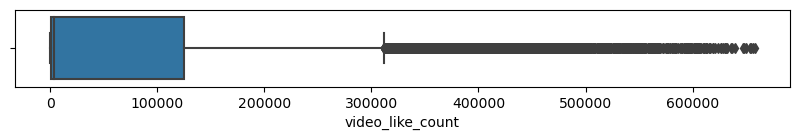

In [18]:
boxplott('video_like_count')

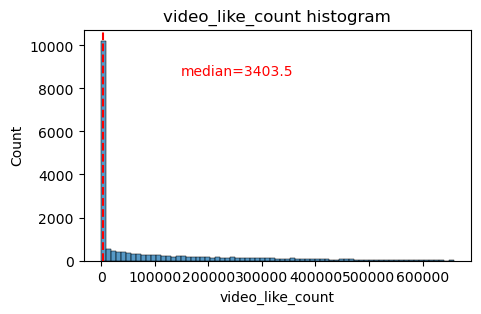

In [19]:
histogrammer('video_like_count')

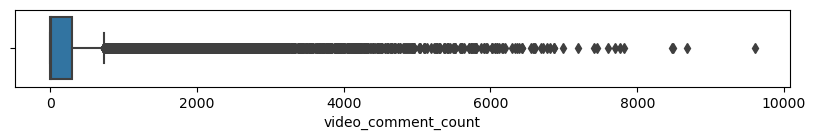

In [20]:
boxplott('video_comment_count')

**Investigating the variable**

In [21]:
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [22]:
data.claim_status.value_counts()

# the Claim varibale is quite balnaced or else we would have to 'stratify' the data 

claim      9608
opinion    9476
Name: claim_status, dtype: int64

***Examing the engagement trend associated with each claim status***

In [23]:
#Average view count of the videos with 'claim status

claims = data[data['claim_status']=='claim']
print('Mean Vew count : ' ,claims['video_view_count'].mean() )
print('Median Vew count : ' ,claims['video_view_count'].median() )

Mean Vew count :  501029.4527477102
Median Vew count :  501555.0


In [24]:
#Average view count of the videos with 'opinion status

opinion = data[data['claim_status']=='opinion']
print('Mean view count :' , opinion['video_view_count'].mean())
print('Median view count :' , opinion['video_view_count'].median())

Mean view count : 4956.43224989447
Median view count : 4953.0


*The mean and median within each category are close to each other but ther is vast discrepancy between view counts for videos labeled as claims and opinion*

**Examining the ban staus**

In [25]:
data.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

*There are more claim videos with bannd authors as compared to opinion vidoes , this could result in following reponsibilities *
* Claim videos are strickly policed than opinion videos
* Authors must comply with stricker rules if the post claim videos 

*Also it should be noted that there's no way of konowing that author is banned due to uploadind of opinion  or calim video *

In [26]:
data.groupby(['author_ban_status']).agg({'video_view_count': ['mean','median','count'], 'video_like_count':['mean','median','count'],\
                                        'video_share_count':['mean','median','count']})

video_view_count                  video_like_count  \
                              mean    median  count             mean   
author_ban_status                                                      
active               215927.039524    8616.0  15383     71036.533836   
banned               445845.439144  448201.0   1635    153017.236697   
under review         392204.836399  365245.5   2066    128718.050339   

                                   video_share_count                  
                     median  count              mean   median  count  
author_ban_status                                                     
active               2222.0  15383      14111.466164    437.0  15383  
banned             105573.0   1635      29998.942508  14468.0   1635  
under review        71204.5   2066      25774.696999   9444.0   2066

*banned authors have median share count 33 times the mdian video share of active author*

*Banned authos and under review get more likes *

In [27]:
data['likes_per_view']=data['video_like_count']/data['video_view_count']
data['comments_per_view']=data['video_comment_count']/data['video_view_count']
data['shares_per_view']=data['video_share_count']/data['video_view_count']

In [28]:
data.groupby(['claim_status','author_ban_status']).agg({'likes_per_view':['median','mean','count'],\
                                                       'comments_per_view':['median','mean','count'],\
                                                       'shares_per_view':['median','mean','count']})

likes_per_view                  \
                                       median      mean count   
claim_status author_ban_status                                  
claim        active                  0.326538  0.329542  6566   
             banned                  0.358909  0.345071  1439   
             under review            0.320867  0.327997  1603   
opinion      active                  0.218330  0.219744  8817   
             banned                  0.198483  0.206868   196   
             under review            0.228051  0.226394   463   

                               comments_per_view                  \
                                          median      mean count   
claim_status author_ban_status                                     
claim        active                     0.000776  0.001393  6566   
             banned                     0.000746  0.001377  1439   
             under review               0.000789  0.001367  1603   
opinion      active                     0.000252  0.000517  8817   
             banned                     0.000193  0.000434   196   
             under review               0.000293  0.000536   463   

                               shares_per_view                  
                                        median      mean count  
claim_status author_ban_status                                  
claim        active                   0.049279  0.065456  6566  
             banned                   0.051606  0.067893  1439  
             under review             0.049967  0.065733  1603  
opinion      active                   0.032405  0.043729  8817  
             banned                   0.030728  0.040531   196  
             under review             0.035027  0.044472   463

* *In case of claim banned and under review authos tend to get more likes and share*
* *and for opnion active and under review get higher engagement*

**Engagement level is strongly correlated with claim staus , Videos with banned authors have significantly higher engagement than videos with active authors**

# Hypothesis Test

**Relationship between video_ciew_count and verified status**

In [29]:
#Import libraries for statistical / hypothesis test

from scipy import stats

In [30]:
data.groupby(['verified_status'])['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

**NULL HYPOTHESIS :** *there is no difference in number of views posted by veified and unverified account on TikTok videos*

**Alternative HYPOTHESIS :** *There is a difference*

In [31]:
# Significance level 5%

not_verified = data[data['verified_status']=='not verified']['video_view_count']
verified =data[data['verified_status']=='verified']['video_view_count']

# two sample t-test
stats.ttest_ind(a=not_verified , b=verified , equal_var = False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

*Since the p-value is significantly small , null hypothesis is rejected*

# Handling Outliers

In [32]:
def handle_outlier(column_str):
    Q1 = data[column_str].quantile(0.25)
    Q3 = data[column_str].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5 * IQR
    data.loc[data[column_str]> upper_limit , column_str ]= upper_limit
#     print (upper_limit)
    return (upper_limit)

In [33]:
Q1 = data['video_like_count'].quantile(0.25)
Q3 = data['video_like_count'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
data.loc[data['video_like_count']> upper_limit , 'video_like_count' ]= upper_limit

In [34]:
handle_outlier('video_like_count')

311333.875

In [35]:
handle_outlier('video_comment_count')

728.5

**Class Balance**

In [36]:
data['verified_status'].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

*Aprximately 94 % of thr dataset represents vodeos posted by unverified accounts anf and 5.8% represents videos posted by verified accounts hence we can conclude that the outcome variable is not balanced*

In [37]:
data_majority = data[data['verified_status']=='not verified']
data_minority = data[data['verified_status']=='verified']

#Upsample the minority class i-e 'verified'

data_minority_upsample = resample(data_minority , replace=True , n_samples=len(data_majority),\
                                 random_state=0)

#Combine majority with minority 
data_upsampled = pd.concat([data_majority , data_minority_upsample]).reset_index(drop=True)

data_upsampled['verified_status'].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [38]:
# Find the average'video _transcription_text' for verified and unverified account repectively

data_upsampled.groupby('verified_status')['video_transcription_text'].agg(func= lambda array : np.mean([len(text) for text in array]))

verified_status
not verified    89.401141
verified        84.569559
Name: video_transcription_text, dtype: float64

In [39]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func=lambda text : len(text))

In [40]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


# Examine the corelation

In [41]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.282755,-0.311144,-0.214349,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.005539,0.005954,-0.001698,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.003731,-0.021063,0.001244,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.278638,0.292290,0.204884,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.565200,0.442375,0.404021,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.485643,0.389892,0.594859,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.476817,0.600509,0.343180,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.455890,0.634753,0.332204,0.217661
likes_per_view,-0.282755,-0.005539,-0.003731,0.278638,0.565200,0.485643,0.476817,0.455890,1.000000,0.539845,0.675187,0.094428
comments_per_view,-0.311144,0.005954,-0.021063,0.292290,0.442375,0.389892,0.600509,0.634753,0.539845,1.000000,0.394044,0.114497


In [42]:
data_upsampled.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'likes_per_view',
       'comments_per_view', 'shares_per_view', 'text_length'],
      dtype='object')

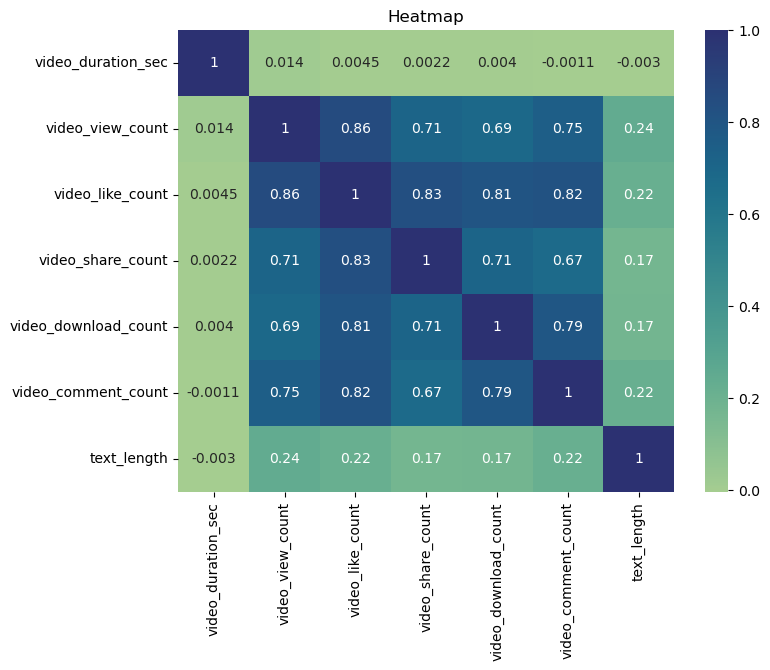

In [43]:
#heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data_upsampled[['video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length']].corr(numeric_only=True),\
           annot=True , cmap='crest')
plt.title("Heatmap")
plt.show()

**The heatmap relveals strong corelation between video_view_count and video_like_count 0.86 T o buid Logistic Model there should be no sever "mulicollinearity**

# Varaiable selection

In [44]:
data_upsampled.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'likes_per_view',
       'comments_per_view', 'shares_per_view', 'text_length'],
      dtype='object')

In [45]:
y=data_upsampled['verified_status']
X=data_upsampled[['claim_status', 'video_duration_sec',
        'author_ban_status',
       'video_view_count', 'video_share_count',
       'video_download_count', 'video_comment_count']]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [47]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

# Encode Variable

In [48]:
X_train.dtypes

claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [49]:
X_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [50]:
X_test['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [51]:
X_train_to_encode=X_train[['author_ban_status','claim_status']]
X_train_to_encode.head()

,author_ban_status,claim_status
1616,active,claim
19948,active,opinion
10153,active,opinion
10063,active,opinion
31007,active,claim


In [52]:
X_encoder=OneHotEncoder(drop='first', sparse_output=False)

#drop=first  helps avoid multicollinearity

In [53]:
X_train_encoded =X_encoder.fit_transform(X_train_to_encode)

In [54]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded , columns = X_encoder.get_feature_names_out())
X_train_encoded_df

,author_ban_status_banned,author_ban_status_under review,claim_status_opinion
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0
...,...,...,...
26821,1.0,0.0,1.0
26822,0.0,0.0,1.0
26823,0.0,0.0,1.0
26824,0.0,0.0,1.0


In [55]:
X_train.columns

Index(['claim_status', 'video_duration_sec', 'author_ban_status',
       'video_view_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')

In [56]:
X_train_final = pd.concat([X_train.drop(columns=['claim_status' , 'author_ban_status']).reset_index(drop=True) , X_train_encoded_df] , axis=1)

In [57]:
y_encoder = OneHotEncoder (drop='first', sparse_output = False)

In [58]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Model Building

In [59]:
#Initializing
log_clf = LogisticRegression(random_state=42 , max_iter =800).fit(X_train_final,y_train_final)

# Results and Evaluation

In [60]:
X_test_to_encode = X_test[['author_ban_status','claim_status']]
X_test_to_encode.head()

,author_ban_status,claim_status
26484,active,opinion
14080,active,opinion
24016,active,claim
22570,under review,opinion
12096,active,opinion


In [61]:
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [62]:
X_test_encoded_df = pd.DataFrame(data=X_test_encoded , columns = X_encoder.get_feature_names_out())

In [63]:
X_test_final = pd.concat([X_test.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True) , \
                        X_test_encoded_df], axis=1)

In [64]:
y_pred =log_clf.predict(X_test_final)

In [65]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

# Confusion Matrix

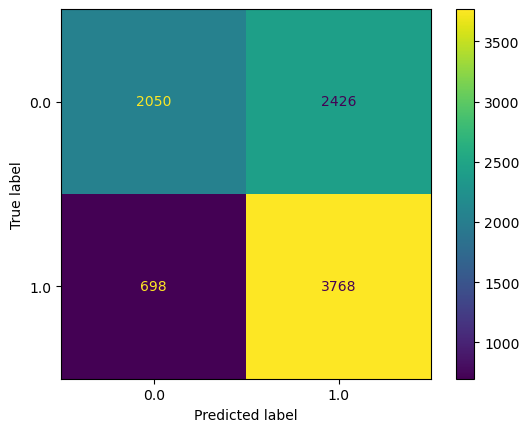

In [66]:
cm = confusion_matrix(y_test_final,y_pred ,labels = log_clf.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels = log_clf.classes_)
cm_plot.plot()
plt.show()

In [67]:
#Accuray TP+TN / TP+TN+FP+FN

(2056+3722)/(2056+2493+671+3722)

0.6461641690896891

**Classification Reort**

In [68]:
target_labels =['verified','not_verified']
print(classification_report(y_test_final , y_pred , target_names = target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.46      0.57      4476
not_verified       0.61      0.84      0.71      4466

    accuracy                           0.65      8942
   macro avg       0.68      0.65      0.64      8942
weighted avg       0.68      0.65      0.64      8942

